# Stock Prediction model using LSTM.

## Neural network:
A neural network is a computational model inspired by the structure and functioning of biological brains. It consists of interconnected nodes, called neurons, organized into layers. Neural networks are designed to learn and recognize patterns and relationships in data by adjusting the strengths of connections between neurons, known as weights.

## A recurrent neural network (RNN):
A recurrent neural network (RNN) architecture is a type of artificial neural network specifically designed to handle sequential and time-dependent data. Unlike traditional feedforward neural networks, which process input data in a single forward pass, RNNs have recurrent connections that allow them to retain and propagate information across multiple time steps.

## LSTM
LSTM stands for Long Short-Term Memory, and it is a type of recurrent neural network (RNN) architecture commonly used in data science and machine learning for sequence modeling and time series analysis.
LSTMs are specifically designed to address the vanishing gradient problem that occurs in traditional RNNs.

# dataset- https://finance.yahoo.com/quote/MSFT/history/


In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("C:/Users/Chinmai/Desktop/stock prediction/MSFT (1).csv")
#"C:\Users\Chinmai\Desktop\stock prediction\MSFT(max).csv"
#"C:\Users\Chinmai\Desktop\stock prediction\MSFT (1).csv"

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
...,...,...,...,...,...,...,...
9409,2023-07-14,347.589996,351.429993,344.309998,345.239990,345.239990,28302200
9410,2023-07-17,345.679993,346.989990,342.200012,345.730011,345.730011,20363900
9411,2023-07-18,345.829987,366.779999,342.170013,359.489990,359.489990,64872700
9412,2023-07-19,361.750000,362.459991,352.440002,355.079987,355.079987,39732900


# dataset
DateOpen
High
Low
Close
Adj Close
Volume

## We will only use the closing value corrosponding to date:

In [4]:
df= df[['Date', 'Close']]

In [5]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9409,2023-07-14,345.239990
9410,2023-07-17,345.730011
9411,2023-07-18,359.489990
9412,2023-07-19,355.079987


In [6]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9409    2023-07-14
9410    2023-07-17
9411    2023-07-18
9412    2023-07-19
9413    2023-07-20
Name: Date, Length: 9414, dtype: object

In [7]:
#we need to change datatype
import datetime


In [8]:
def str_to_datetime(s):
    split= s.split('-')
    year, month, day= int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year= year, month= month, day=day)
datetime_object= str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [9]:
df['Date']= df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\Chinmai\AppData\Local\Temp\ipykernel_50936\1066266531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']= df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9409   2023-07-14
9410   2023-07-17
9411   2023-07-18
9412   2023-07-19
9413   2023-07-20
Name: Date, Length: 9414, dtype: datetime64[ns]

In [10]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9409,2023-07-14,345.239990
9410,2023-07-17,345.730011
9411,2023-07-18,359.489990
9412,2023-07-19,355.079987


In [11]:
#setting index to date

df.index= df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-07-14,345.239990
2023-07-17,345.730011
2023-07-18,359.489990


In [12]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Stock Close Prices over Time')

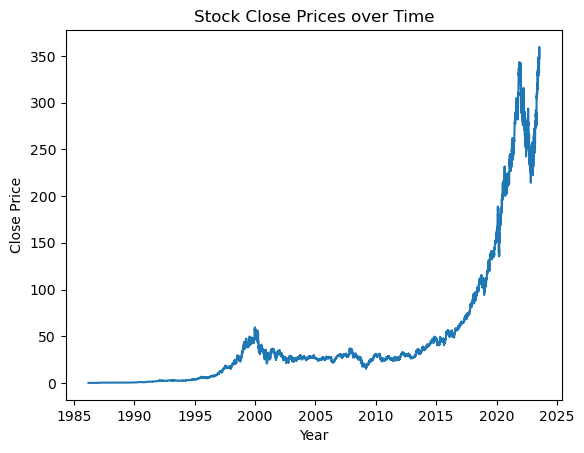

In [13]:
plt.plot(df.index, df['Close'])
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Stock Close Prices over Time')

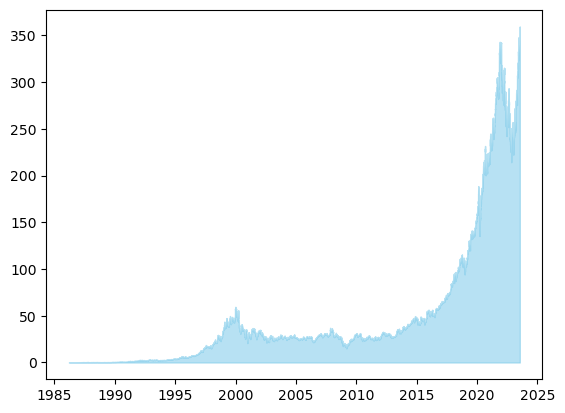

In [14]:
plt.fill_between(df.index, df['Close'], color='skyblue', alpha=0.6)


## for LSTM model, we need to convert this into supervised learning problem

In [15]:
import numpy as np
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date
  
    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
    
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return
        
         
        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
        if last_time:
              break
    
        target_date = next_date

        if target_date == last_date:
              last_time = True
    
    ret_df = pd.DataFrame({})
        
    ret_df['Target Date'] = dates
  
    X = np.array(X)
    for i in range(0, n):
            
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]
  
        ret_df['Target'] = Y

    return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '1986-03-18', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target,Target-2,Target-1
0,1986-03-18,0.097222,0.099826,0.100694,0.102431
1,1986-03-19,0.100694,0.098090,0.102431,0.099826
2,1986-03-20,0.102431,0.095486,0.099826,0.098090
3,1986-03-21,0.099826,0.092882,0.098090,0.095486
4,1986-03-24,0.098090,0.090278,0.095486,0.092882
...,...,...,...,...,...
9074,2022-03-17,276.440002,295.220001,287.149994,294.390015
9075,2022-03-18,287.149994,300.429993,294.390015,295.220001
9076,2022-03-21,294.390015,299.160004,295.220001,300.429993
9077,2022-03-22,295.220001,304.059998,300.429993,299.160004


In [16]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np= windowed_dataframe.to_numpy()
    dates= df_as_np[:, 0]
    
    middle_matrix= df_as_np[:, 1: -1] #only target-1, -2, -3
    
    #this is actually a wrong shape for LSTM
    
    X= middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    #this is univariate forecasting
    
    Y= df_as_np[:, -1]
    
    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y= windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape
    

((9079,), (9079, 3, 1), (9079,))

9079 rows
we are looking 3 steps in the past but for only 1 type of variable.

# Split to train and test and also validation set

In [17]:
# Split to train and test and also validation set
#two int to divide the array into 80-20% and 90-19%

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

#train set has 80% of data
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

#data between 80th and 90th percentile
#This ensures that the validation set contains data that comes after the training set and precedes the test set.
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

#will contain the last 10% of the data (from the 90th percentile to the end).
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]


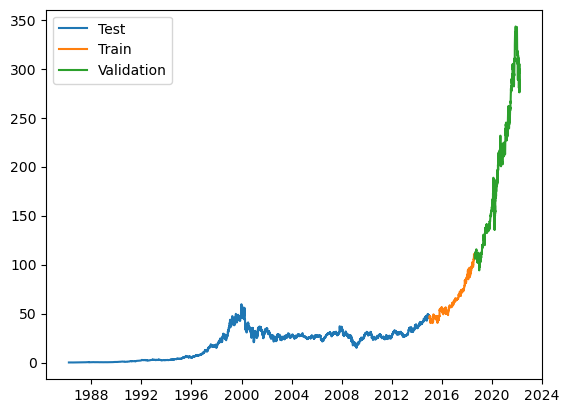

In [18]:
#Visualisation

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Test', 'Train', 'Validation'])

# create and train our model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [23]:
model= Sequential([layers.Input((3,1)), 
                  layers.LSTM(64),
                  layers.Dense(32, activation= 'relu'),
                  layers.Dense(32, activation= 'relu'),
                  layers.Dense(1)])
model.compile(loss='mse', optimizer= Adam(learning_rate=0.001),
             metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
227/227 [==============================] - 6s 11ms/step - loss: 126.1175 - mean_absolute_error: 5.2776 - val_loss: 507.3340 - val_mean_absolute_error: 15.2152
Epoch 2/100
227/227 [==============================] - 2s 7ms/step - loss: 0.2582 - mean_absolute_error: 0.2672 - val_loss: 394.3264 - val_mean_absolute_error: 12.5841
Epoch 3/100
227/227 [==============================] - 1s 6ms/step - loss: 0.1972 - mean_absolute_error: 0.2573 - val_loss: 342.9785 - val_mean_absolute_error: 11.4059
Epoch 4/100
227/227 [==============================] - 1s 5ms/step - loss: 0.1830 - mean_absolute_error: 0.2523 - val_loss: 317.0025 - val_mean_absolute_error: 10.7425
Epoch 5/100
227/227 [==============================] - 1s 6ms/step - loss: 0.1846 - mean_absolute_error: 0.2604 - val_loss: 299.5095 - val_mean_absolute_error: 10.2460
Epoch 6/100
227/227 [==============================] - 1s 5ms/step - loss: 0.1732 - mean_absolute_error: 0.2452 - val_loss: 286.3495 - val_mean_absolute_erro

KeyboardInterrupt: 

227/227 [==============================] - 1s 2ms/step


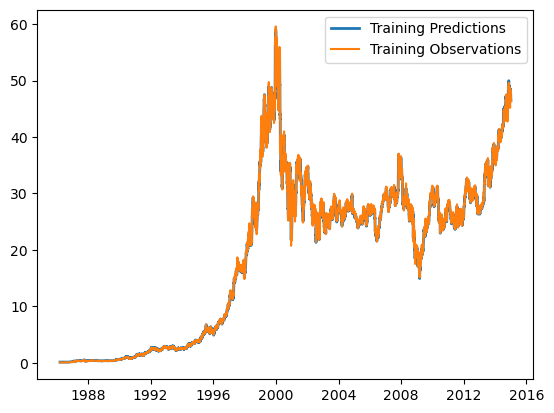

In [25]:
#visualition
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions, linewidth=2)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

29/29 [==============================] - 0s 2ms/step


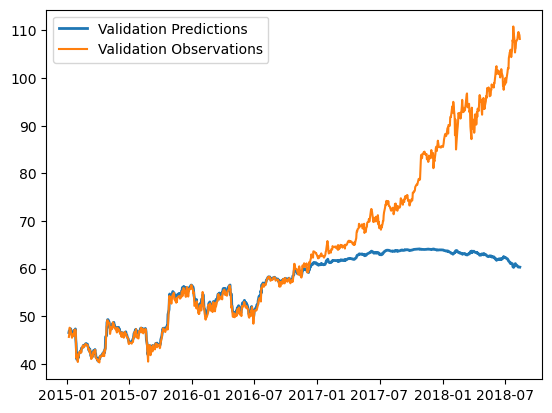

In [27]:
val_predictions = model.predict(X_val).flatten() # flatten converts prediction to 1D array

plt.plot(dates_val, val_predictions, linewidth= 2)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

prediction zoned off

29/29 [==============================] - 0s 2ms/step


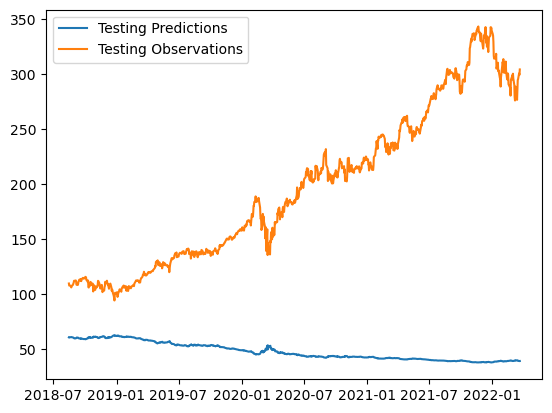

In [28]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

it doesn't follow at all

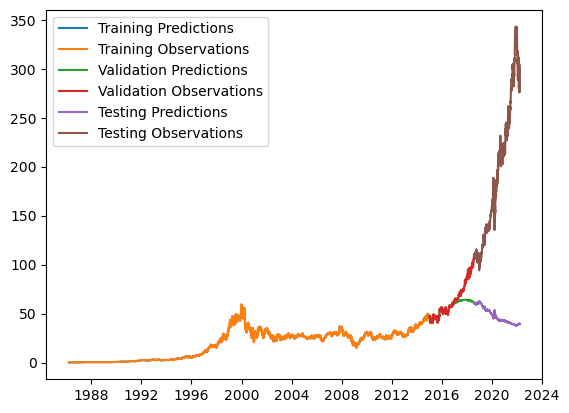

In [29]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

#we only have to train our model from where the predictions are wrong

In [30]:
import numpy as np
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date
  
    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
    
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return
        
         
        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
        if last_time:
              break
    
        target_date = next_date

        if target_date == last_date:
              last_time = True
    
    ret_df = pd.DataFrame({})
        
    ret_df['Target Date'] = dates
  
    X = np.array(X)
    for i in range(0, n):
            
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]
  
        ret_df['Target'] = Y

    return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target,Target-2,Target-1
0,2021-03-25,235.990005,232.339996,237.580002,235.460007
1,2021-03-26,237.580002,236.479996,235.460007,232.339996
2,2021-03-29,235.460007,235.240005,232.339996,236.479996
3,2021-03-30,232.339996,231.850006,236.479996,235.240005
4,2021-03-31,236.479996,235.770004,235.240005,231.850006
...,...,...,...,...,...
247,2022-03-17,276.440002,295.220001,287.149994,294.390015
248,2022-03-18,287.149994,300.429993,294.390015,295.220001
249,2022-03-21,294.390015,299.160004,295.220001,300.429993
250,2022-03-22,295.220001,304.059998,300.429993,299.160004


In [31]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np= windowed_dataframe.to_numpy()
    dates= df_as_np[:, 0]
    
    middle_matrix= df_as_np[:, 1: -1] #only target-1, -2, -3
    
    #this is actually a wrong shape for LSTM
    
    X= middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    #this is univariate forecasting
    
    Y= df_as_np[:, -1]
    
    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y= windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape
    

((252,), (252, 3, 1), (252,))

In [32]:
# Split to train and test and also validation set



#two int to divide the array into 80-20% and 90-19%

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

#train set has 80% of data
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

#data between 80th and 90th percentile
#This ensures that the validation set contains data that comes after the training set and precedes the test set.
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

#will contain the last 10% of the data (from the 90th percentile to the end).
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]


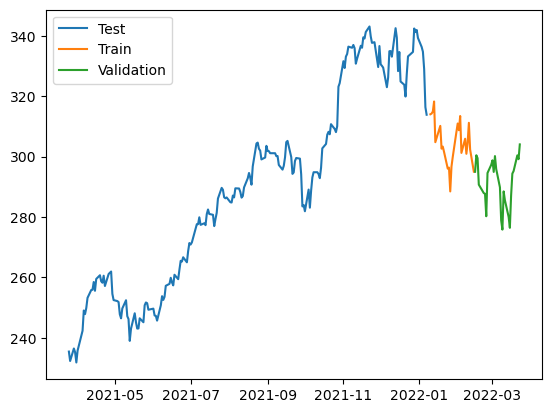

In [33]:
#Visualisation

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Test', 'Train', 'Validation'])

# create and train our model

In [39]:
model= Sequential([layers.Input((3,1)), 
                  layers.LSTM(64),
                  layers.Dense(32, activation= 'relu'),
                  layers.Dense(32, activation= 'relu'),
                  layers.Dense(1)])
model.compile(loss='mse', optimizer= Adam(learning_rate=0.001),
             metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 115ms/step - loss: 84295.0547 - mean_absolute_error: 288.5732 - val_loss: 92533.6094 - val_mean_absolute_error: 304.1065
Epoch 2/100
7/7 [==============================] - 0s 24ms/step - loss: 83905.6094 - mean_absolute_error: 287.8968 - val_loss: 92187.9531 - val_mean_absolute_error: 303.5376
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 83577.7109 - mean_absolute_error: 287.3266 - val_loss: 91829.2266 - val_mean_absolute_error: 302.9462
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 83205.4453 - mean_absolute_error: 286.6759 - val_loss: 91363.9062 - val_mean_absolute_error: 302.1772
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 82726.7656 - mean_absolute_error: 285.8412 - val_loss: 90796.4688 - val_mean_absolute_error: 301.2368
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 82125.7891 - mean_absolute_error: 284.7889 - val_loss: 900

7/7 [==============================] - 1s 2ms/step


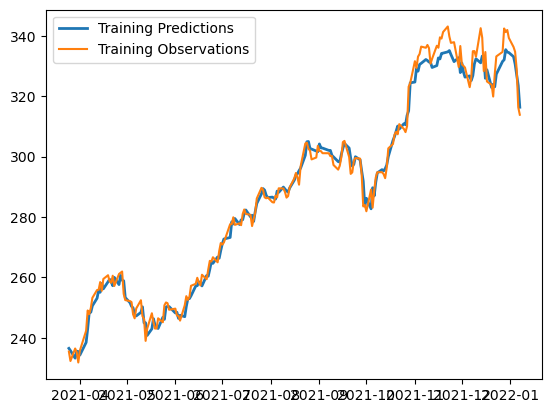

In [40]:
#visualition
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions, linewidth=2)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 21ms/step


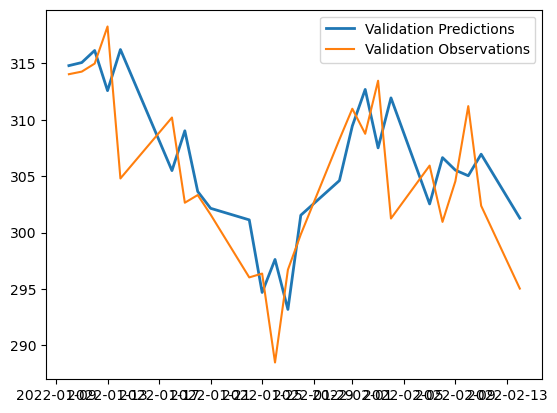

In [41]:
val_predictions = model.predict(X_val).flatten() # flatten converts prediction to 1D array

plt.plot(dates_val, val_predictions, linewidth= 2)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 22ms/step


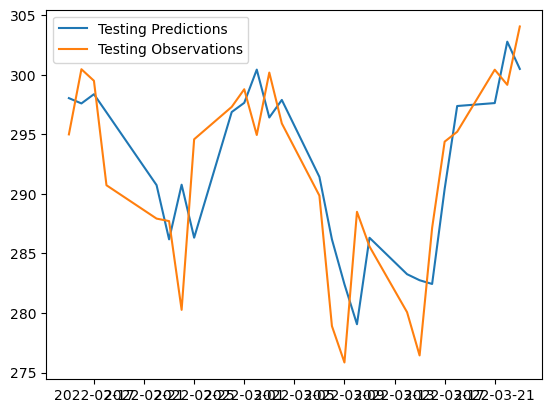

In [42]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

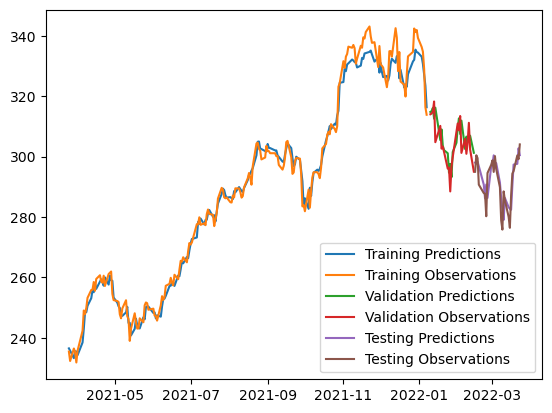

In [43]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

Basically we have to use the data from three days before, to predict the next day

model will recurssively predict the future

In [44]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    
    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction

1/1 [==============================] - 0s 85ms/step


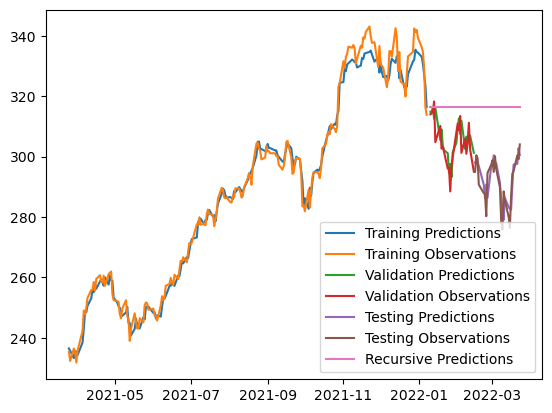

In [45]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])